In [1]:
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
df = pd.read_csv('testset.csv')
df['datetime'] = pd.to_datetime(df['datetime'].apply(lambda x: datetime.strptime(x, "%Y%m%d-%H:%M").strftime("%Y%m%d %H:%M")))
df = df.set_index('datetime', drop = True)
df.index.name = 'datetime'

data = df.resample('M').mean().interpolate()
#data

In [3]:
tmp = data.Temperature
tmp1 = tmp.shift(1)
tmp2 = tmp.shift(2)
tmp3 = tmp.shift(3)
newdata = pd.concat([tmp, tmp1, tmp2, tmp3], axis = 1)
newdata = newdata.dropna()
newdata.columns = ['t', 't+1', 't+2', 't+3']
newdata.head()

,t,t+1,t+2,t+3
datetime,,,,
1997-02-28,15.778777,12.871118,13.816794,19.438944
1997-03-31,21.137037,15.778777,12.871118,13.816794
1997-04-30,26.306931,21.137037,15.778777,12.871118
1997-05-31,29.949821,26.306931,21.137037,15.778777
1997-06-30,31.806202,29.949821,26.306931,21.137037


In [4]:
split = int(newdata.shape[0] * 0.8)
y = []
y_hat = []

In [5]:
for i in range(split, len(newdata)):
    train, test = newdata.iloc[:i, :], newdata.iloc[i:, :]
    X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
    X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(X_train, y_train)
    y.append(y_test.iloc[0])
    y_hat.append(model.predict(X_test)[0])
    print(">>expected={:.3f} >>predicted={:.3f}".format(y[-1], y_hat[-1]))

>>expected=12.187 >>predicted=14.622
>>expected=16.878 >>predicted=17.166
>>expected=23.030 >>predicted=22.416
>>expected=29.000 >>predicted=30.551
>>expected=33.716 >>predicted=31.989
>>expected=32.387 >>predicted=31.323
>>expected=30.702 >>predicted=30.872
>>expected=29.489 >>predicted=29.730
>>expected=29.867 >>predicted=29.342
>>expected=26.035 >>predicted=24.653
>>expected=18.807 >>predicted=19.923
>>expected=15.171 >>predicted=15.101
>>expected=13.455 >>predicted=12.429
>>expected=15.721 >>predicted=17.416
>>expected=21.594 >>predicted=22.376
>>expected=28.067 >>predicted=25.454
>>expected=31.413 >>predicted=32.405
>>expected=34.771 >>predicted=32.457
>>expected=32.258 >>predicted=33.716
>>expected=31.079 >>predicted=29.769
>>expected=29.767 >>predicted=29.156
>>expected=26.506 >>predicted=25.239
>>expected=20.104 >>predicted=21.132
>>expected=14.780 >>predicted=14.853
>>expected=12.713 >>predicted=15.647
>>expected=18.766 >>predicted=16.788
>>expected=21.555 >>predicted=20.955
>

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y, y_hat)

0.9112415460781955

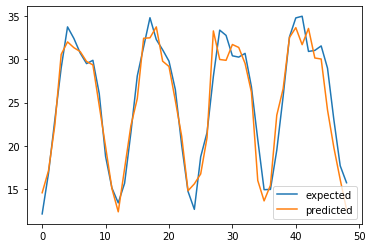

In [7]:
plt.plot(y, label = 'expected')
plt.plot(y_hat, label = 'predicted')
plt.legend()
plt.show()